**Project Title: Video Game Success Through the Lens of Sales, Reviews, and Regional Preferences**

Members: Sharon Yin, Kyra Zhu

Webpage: https://zzzyx21.github.io

**Datasets**
- Brief description
  - The first dataset we are using is the 2024 video game sales from Kaggle (https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024). We explore the popularity of games/genres/consoles across different regions (North America, Japan, Europe/Africa, other), and explore the correlation between critic scores a
  nd total sales to understand how critical acclaim influences commercial success.
  - The second dataset we are using is the 2023 Steam Store games also from Kaggle (https://www.kaggle.com/datasets/bernsn/steam-games-2023-cleaned). We combine this data and the above 2024 video game sales together to analyze if there is a correlation relationship between the reviews and other information of the hot pick games and the high sales, so that we can identify patterns in game popularity and pricing over time.
  
  Therefore, there are three questions we are going to investigate:
  1. What are the relationship/correlation between critic scores and total sales?
  2. How does the distribution of sales vary across different regions?
  3. What are the patterns in game popularity and pricing over time?

- Interesting stat/dataset
  1. One interesting stat is that the distribution of 'total_sales'. Most of the 'total_sales' happened between 0.0-2.5 millions with a range from 0.0 to 20.3 million sales, indicating that most video games were sold 0.0-2.5 millions. From the total sales distribution, we can say it does set a foundation for understanding market dynamics.
  2. The scatter plot showing the critic scores and total sales for video games is also interesting. While there is a spread of data points, indicating variability in sales across different critic scores, we may observe some trends or patterns that suggest a relationship between higher critic scores and total sales. However, the relationship is not strictly linear, and there are games with high critic scores that do not necessarily have the highest total sales, and vice versa.
  3. The boxplot showing the distribution of sales across different regions: North America (NA), Japan (JP), Europe/Africa (PAL), and Other regions represents the spread of sales within each region, including the median, the interquartile range, and potential outliers. Sales in North America tend to be higher on average compared to other regions, with a wider spread indicating significant variability in game popularity.



- one graph/dataset
  - The graph of the distribution of total_sales is shown below.


**Collaboration plan**

Our team plans to have weekly meetings to discuss progress, challenges, and next steps to make sure the project is on the right track. Some of the main technologies that we are going to use include Google Colab, pandas, GitHub, Python coding, etc. In terms of communication, Slack would be the tool for regular updates and discussions. Also, additional ad-hoc meetings would occur as needed for problem-solving or decision-making. To manage and collaborate on code and documentation, we are using version control systems via GitHub. We will divided up tasks and conquer and each of us is expected to work about 50% of the work.



**Citation:**

Bayne Brannen, and Asaniczka. (2024). Video Game Sales 2024 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7507070

Kanchana1990. (2024a, February 6). Steam store 2024: Hot Picks & reviews 💨. Kaggle. https://www.kaggle.com/datasets/kanchana1990/steam-store-2024-hot-picks-and-reviews

In [ ]:
%cd /content
!git clone https://github.com/zzzyx21/zzzyx21.github.io.git
%cd /content/zzzyx21.github.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/content
fatal: destination path 'zzzyx21.github.io' already exists and is not an empty directory.
/content/zzzyx21.github.io


We read in the first data table and name it as games. We also only select out the needed information and we dropped the image,  publisher, and the release & last update dates.

In [ ]:
games = pd.read_csv("./vgchartz-2024.csv")
games = games[["title", "console", "genre", "critic_score", "total_sales", "na_sales", "jp_sales", "pal_sales", "other_sales"]]
games.head()

,title,console,genre,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto V,PS3,Action,9.4,20.32,6.37,0.99,9.85,3.12
1,Grand Theft Auto V,PS4,Action,9.7,19.39,6.06,0.60,9.71,3.02
2,Grand Theft Auto: Vice City,PS2,Action,9.6,16.15,8.41,0.47,5.49,1.78
3,Grand Theft Auto V,X360,Action,NaN,15.86,9.06,0.06,5.33,1.42
4,Call of Duty: Black Ops 3,PS4,Shooter,8.1,15.09,6.18,0.41,6.05,2.44


We now check the dtypes of each column, which makes sense.

In [ ]:
games.dtypes

title            object
console          object
genre            object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
dtype: object

In [ ]:
games['console'].value_counts() #This is the statistic of different kinds of consoles.

PC      12617
PS2      3565
DS       3288
PS4      2878
PS       2707
        ...  
TG16        3
FDS         1
C128        1
Aco         1
BBCM        1
Name: console, Length: 81, dtype: int64

In [ ]:
games["genre"].value_counts() #This is the statistic of different genre names in the genre category.

Misc                9304
Action              8557
Adventure           6260
Role-Playing        5721
Sports              5586
Shooter             5410
Platform            4001
Strategy            3685
Puzzle              3521
Racing              3425
Simulation          3158
Fighting            2367
Action-Adventure    1877
Visual Novel         493
Music                297
Party                151
MMO                  115
Education             35
Board Game            33
Sandbox               20
Name: genre, dtype: int64

Here is the summary statistics for numerical columns

In [ ]:
summary_statistics = games.describe()
summary_statistics

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,64016.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,0.470575,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.220440,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.220440,0.120000,0.120000,0.040000,0.040000,0.010000
75%,7.220440,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


We filtered out the highest critic score games with a critic score = 10.

In [ ]:
highest_critic_score = games[["title", "console", "genre", "critic_score", "total_sales"]].loc[games['critic_score']==10]
highest_critic_score
# The most popular games with the highest critic_score are Grand Theft Auto IV and Red Dead Redemption: Undead Nightmare. Meanwhile, three different versions of The Legend of Zelda also got 10.0.

,title,console,genre,critic_score,total_sales
16,Grand Theft Auto IV,X360,Action,10.0,11.09
19,Grand Theft Auto IV,PS3,Action,10.0,10.57
1191,Red Dead Redemption: Undead Nightmare,PS3,Action,10.0,1.18
1290,Red Dead Redemption: Undead Nightmare,X360,Action,10.0,1.11
19051,Final Fight,SNES,Action,10.0,NaN
24660,The Legend of Zelda: A Link to the Past,SNES,Adventure,10.0,NaN
27438,The Legend of Zelda Collector's Edition,GC,Adventure,10.0,NaN
29250,The Legend of Zelda: Breath of the Wild,WiiU,Action-Adventure,10.0,NaN
31619,The gamrReview Test Game,NES,Fighting,10.0,NaN
32178,Minecraft,PC,Misc,10.0,NaN


We now generate out the game with highest total sales according to different areas.

In [ ]:
highest_total_sales = games["title"].loc[games['total_sales'] == games['total_sales'].max()]
highest_na_sales = games["title"].loc[games['na_sales'] == games['na_sales'].max()]
highest_jp_sales = games["title"].loc[games['jp_sales'] == games['jp_sales'].max()]
highest_pal_sales = games["title"].loc[games['pal_sales'] == games['pal_sales'].max()]
print("game with highest toal sales: ", highest_total_sales, "\nghighest North American sale: ", highest_na_sales, "\nhighest Japanese sale: ", highest_jp_sales, "\nhighest European/African sale: ", highest_pal_sales)
# while the game with the highest total sales is Grand Theft Auto V

game with highest toal sales:  0    Grand Theft Auto V
Name: title, dtype: object 
ghighest North American sale:  6    Call of Duty: Black Ops
Name: title, dtype: object 
highest Japanese sale:  299    Hot Shots Golf
349    Hot Shots Golf
Name: title, dtype: object 
highest European/African sale:  0    Grand Theft Auto V
Name: title, dtype: object


We now generate the figure for the distribution of total sales. We can see that the graph is extremely right skewed.

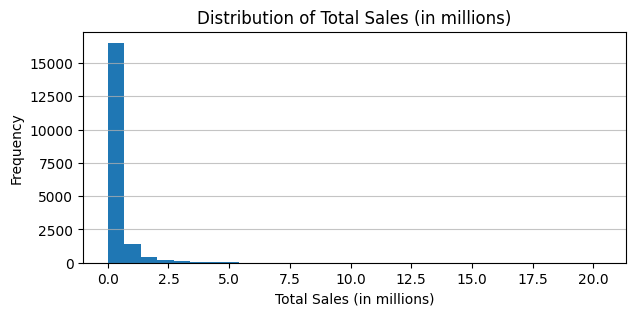

In [ ]:
plt.figure(figsize=(7,3))
plt.hist(games['total_sales'], bins=30)
plt.title('Distribution of Total Sales (in millions)')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

The correlation between the critic score and the total sales can be calculated.

In [ ]:
games["critic_score"].corr(games["total_sales"])
# a correlation coefficient of 0.2 is considered to be negligible correlation.

0.209954163975318

<Axes: xlabel='critic_score', ylabel='total_sales'>

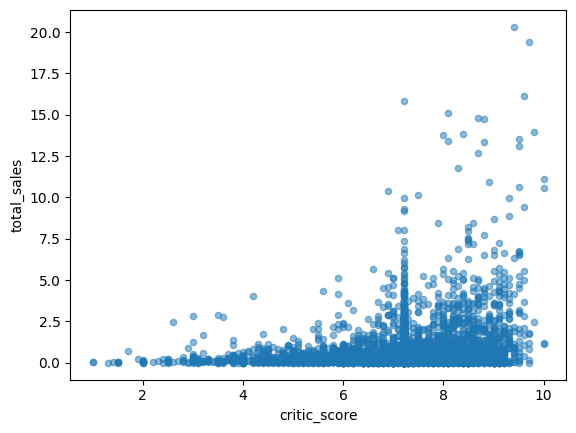

In [ ]:
games.plot.scatter(x="critic_score", y="total_sales", alpha=.5)
# There is very weak or no association between critic scores and total sales.

We want to see the sales distribution across different regions.

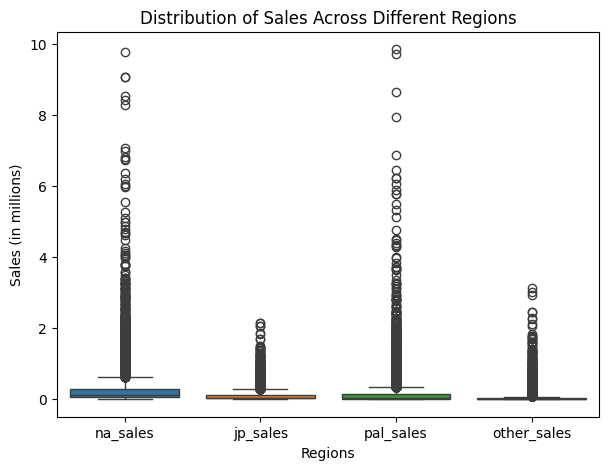

In [ ]:
# Boxplot for sales distribution across different regions
plt.figure(figsize = (7,5))
sns.boxplot(data = games[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']])
plt.title('Distribution of Sales Across Different Regions')
plt.ylabel('Sales (in millions)')
plt.xlabel('Regions')
plt.show()


# Table 2:
We now read in the second table and name it as steam.

In [ ]:
steam = pd.read_csv("./steam_store_data_2024.csv")
steam = steam[["title", "price", "allReviews"]]
steam

,title,price,allReviews
0,Ori and the Will of the Wisps,$9.89,Overwhelmingly Positive
1,"Flashing Lights - Police, Firefighting, Emerge...",$8.49,Very Positive
2,Thronefall,$5.24,Overwhelmingly Positive
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,$23.99,Very Positive
4,UNDYING,$13.99,Mostly Positive
...,...,...,...
81,Bendy and the Dark Revival,$5.99,Very Positive
82,STAR WARS™ - The Force Unleashed™ Ultimate Sit...,$6.99,Very Positive
83,Thymesia,$14.99,Very Positive
84,Last Train Home,$26.39,Very Positive


We change the all reviews to numeric that can be easier for us to analyze later. Overwhelmingly positive points to 9 scores, Very Positive points to 8 scores and so on.

In [ ]:
ratings_map = {
    'Overwhelmingly Positive': 9,
    'Very Positive': 8,
    'Positive': 7,
    'Mostly Positive': 6,
    'Mixed': 5,
    'Mostly Negative': 4,
    'Negative': 3,
    'Very Negative': 2,
    'Overwhelmingly Negative': 1
}

steam['allReviews'] = steam['allReviews'].replace(ratings_map)
steam

,title,price,allReviews
0,Ori and the Will of the Wisps,$9.89,9.0
1,"Flashing Lights - Police, Firefighting, Emerge...",$8.49,8.0
2,Thronefall,$5.24,9.0
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,$23.99,8.0
4,UNDYING,$13.99,6.0
...,...,...,...
81,Bendy and the Dark Revival,$5.99,8.0
82,STAR WARS™ - The Force Unleashed™ Ultimate Sit...,$6.99,8.0
83,Thymesia,$14.99,8.0
84,Last Train Home,$26.39,8.0


Check the data types.

In [ ]:
steam.dtypes

title          object
price          object
allReviews    float64
dtype: object

Delte 'price' columns the $ sign and change to the float64.

In [ ]:
steam['price'] = steam['price'].astype(str)
steam['price'] = steam['price'].str.replace('$', '', regex = False)
steam['price'] = steam['price'].astype('float64')
steam.head()

,title,price,allReviews
0,Ori and the Will of the Wisps,9.89,9.0
1,"Flashing Lights - Police, Firefighting, Emerge...",8.49,8.0
2,Thronefall,5.24,9.0
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,23.99,8.0
4,UNDYING,13.99,6.0


Check the data types of the data frame.

In [ ]:
steam.dtypes

title          object
price         float64
allReviews    float64
dtype: object